# 第3章 k近邻法

## 习题3.1
&emsp;&emsp;参照图3.1，在二维空间中给出实例点，画出$k$为1和2时的$k$近邻法构成的空间划分，并对其进行比较，体会$k$值选择与模型复杂度及预测准确率的关系。

**解答：**

**解答思路：**
1. 参照图3.1，使用已给的实例点，采用sklearn的KNeighborsClassifier分类器，对k=1和2时的模型进行训练
2. 使用matplotlib的contourf和scatter，画出k为1和2时的k近邻法构成的空间划分
3. 根据模型得到的预测结果，计算预测准确率，并设置图形标题
4. 根据程序生成的图，比较k为1和2时，k值选择与模型复杂度、预测准确率的关系

**解答步骤：**

**第1、2、3步：使用已给的实例点，对$k$为1和2时的k近邻模型进行训练，并绘制空间划分**

In [1]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
%matplotlib inline

data = np.array([[5, 12, 1],
                 [6, 21, 0],
                 [14, 5, 0],
                 [16, 10, 0],
                 [13, 19, 0],
                 [13, 32, 1],
                 [17, 27, 1],
                 [18, 24, 1],
                 [20, 20, 0],
                 [23, 14, 1],
                 [23, 25, 1],
                 [23, 31, 1],
                 [26, 8, 0],
                 [30, 17, 1],
                 [30, 26, 1],
                 [34, 8, 0],
                 [34, 19, 1],
                 [37, 28, 1]])
# 得到特征向量
X_train = data[:, 0:2]
# 得到类别向量
y_train = data[:, 2]

#（1）使用已给的实例点，采用sklearn的KNeighborsClassifier分类器，
# 对k=1和2时的模型进行训练
# 分别构造k=1和k=2的k近邻模型
models = (KNeighborsClassifier(n_neighbors=1, n_jobs=-1),
          KNeighborsClassifier(n_neighbors=2, n_jobs=-1))
# 模型训练
models = (clf.fit(X_train, y_train) for clf in models)

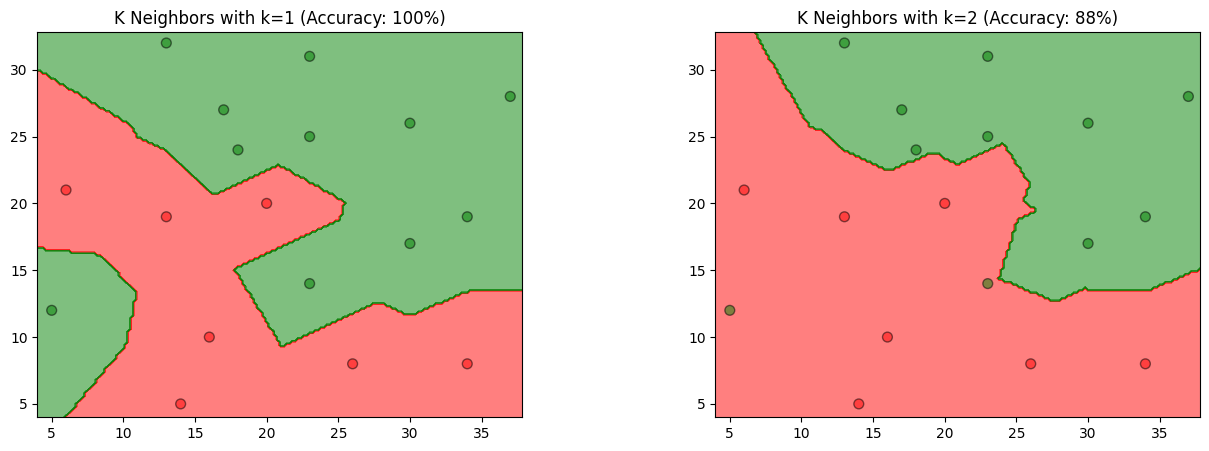

In [2]:
# 设置图形标题
titles = ('K Neighbors with k=1',
          'K Neighbors with k=2')

# 设置图形的大小和图间距
fig = plt.figure(figsize=(15, 5))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# 分别获取第1个和第2个特征向量
X0, X1 = X_train[:, 0], X_train[:, 1]

# 得到坐标轴的最小值和最大值
x_min, x_max = X0.min() - 1, X0.max() + 1
y_min, y_max = X1.min() - 1, X1.max() + 1

# 构造网格点坐标矩阵
# 设置0.2的目的是生成更多的网格点，数值越小，划分空间之间的分隔线越清晰
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2),
                     np.arange(y_min, y_max, 0.2))

for clf, title, ax in zip(models, titles, fig.subplots(1, 2).flatten()):
    # （2）使用matplotlib的contourf和scatter，画出k为1和2时的k近邻法构成的空间划分
    # 对所有网格点进行预测
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # 设置颜色列表
    colors = ('red', 'green', 'lightgreen', 'gray', 'cyan')
    # 根据类别数生成颜色
    cmap = ListedColormap(colors[:len(np.unique(Z))])
    # 绘制分隔线，contourf函数用于绘制等高线，alpha表示颜色的透明度，一般设置成0.5
    ax.contourf(xx, yy, Z, cmap=cmap, alpha=0.5)

    # 绘制样本点
    ax.scatter(X0, X1, c=y_train, s=50, edgecolors='k', cmap=cmap, alpha=0.5)

    # （3）根据模型得到的预测结果，计算预测准确率，并设置图形标题
    # 计算预测准确率
    acc = clf.score(X_train, y_train)
    # 设置标题
    ax.set_title(title + ' (Accuracy: %d%%)' % (acc * 100))

plt.show()

> **补充知识：**   
np.meshgrid方法：用于构造网格点坐标矩阵，可参考https://blog.csdn.net/lllxxq141592654/article/details/81532855

**第4步：比较$k$为1和2时，k值选择与模型复杂度、预测准确率的关系**

1. $k$值选择与模型复杂度的关系  
&emsp;&emsp;根据书中第3.2.3节$k$值的选择：
  > &emsp;&emsp;如果选择较小的$k$值，就相当于用较小的邻域中的训练实例进行预测，“学习”的近似误差会减小，只有与输入实例较近的（相似的）训练实例才会对预测结果起作用。$k$值的减小就意味着整体模型变得复杂，容易发生过拟合。  
  > &emsp;&emsp;如果选择较大的$k$值，就相当于用较大邻域中的训练实例进行预测。$k$值的增大就意味着整体的模型变得简单。

  &emsp;&emsp;综上所属，$k$值越大，模型复杂度越低，模型越简单，容易发生欠拟合。反之，$k$值越小，模型越复杂，容易发生过拟合。

  
  
2. $k$值选择与预测准确率的关系  
&emsp;&emsp;从图中观察到，当$k=1$时，模型易产生过拟合，当$k=2$时准确率仅有88%，故在过拟合发生前，$k$值越大，预测准确率越低，也反映模型泛化能力越差，模型简单。反之，$k$值越小，预测准确率越高，模型具有更好的泛化能力，模型复杂。

## 习题3.2
&emsp;&emsp;利用例题3.2构造的$kd$树求点$x=(3,4.5)^T$的最近邻点。

**解答：**

**解答思路：**  

**方法一：**
1. 使用sklearn的KDTree类，结合例题3.2构建平衡$kd$树，配置相关参数（构建平衡树kd树算法，见书中第54页算法3.2内容）；
2. 使用tree.query方法，查找(3, 4.5)的最近邻点（搜索kd树算法，见书中第55页第3.3.2节内容）；
3. 根据第3步返回的参数，得到最近邻点。

**方法二：**  
&emsp;&emsp;根据书中第3章算法3.3用$kd$树的最近邻搜索方法，查找(3, 4.5)的最近邻点

**解答步骤：**

**方法一：**

In [3]:
import numpy as np
from sklearn.neighbors import KDTree

# 构造例题3.2的数据集
train_data = np.array([[2, 3],
                       [5, 4],
                       [9, 6],
                       [4, 7],
                       [8, 1],
                       [7, 2]])
# （1）使用sklearn的KDTree类，构建平衡kd树
# 设置leaf_size为2，表示平衡树
tree = KDTree(train_data, leaf_size=2)

# （2）使用tree.query方法，设置k=1，查找(3, 4.5)的最近邻点
# dist表示与最近邻点的距离，ind表示最近邻点在train_data的位置
dist, ind = tree.query(np.array([[3, 4.5]]), k=1)
node_index = ind[0]

# （3）得到最近邻点
x1 = train_data[node_index][0][0]
x2 = train_data[node_index][0][1]
print("x点(3,4.5)的最近邻点是({0}, {1})".format(x1, x2))

x点(3,4.5)的最近邻点是(2, 3)


可得到点$x=(3,4.5)^T$的最近邻点是$(2,3)^T$

**方法二：** 

1. 首先找到点$x=(3,4.5)^T$所在领域的叶节点$x_1=(4,7)^T$，则最近邻点一定在以$x$为圆心，$x$到$x_1$距离为半径的圆内；
2. 找到$x_1$的父节点$x_2=(5,4)^T$，$x_2$的另一子节点为$x_3=(2,3)^T$，此时$x_3$在圆内，故$x_3$为最新的最近邻点，并形成以$x$为圆心，以$x$到$x_3$距离为半径的圆；
3. 继续探索$x_2$的父节点$x_4=(7,2)^T$,$x_4$的另一个子节点$(9,6)$对应的区域不与圆相交，故不存在最近邻点，所以最近邻点为$x_3=(2,3)^T$。

可得到点$x=(3,4.5)^T$的最近邻点是$(2,3)^T$

## 习题3.3
&emsp;&emsp;参照算法3.3，写出输出为$x$的$k$近邻的算法。

**解答：**

**解答思路：**
1. 参考书中第3章算法3.3（用$kd$树的最近邻搜索），写出输出为$x$的$k$近邻算法；
2. 根据算法步骤，写出算法代码，并用习题3.2的解进行验证。

**解答步骤：**

**第1步：用$kd$树的$k$邻近搜索算法**

根据书中第3章算法3.3：
> **算法3.3 用$kd$树的最近邻搜索**  
> 输入：已构造的kd树；目标点$x$；    
输出：$x$的k近邻    
（1）在$kd$树中找出包含目标点$x$的叶结点：从根结点出发，递归地向下访问树。若目标点$x$当前维的坐标小于切分点的坐标，则移动到左子结点，否则移动到右子结点，直到子结点为叶结点为止；  
（2）如果“当前$k$近邻点集”元素数量小于$k$或者叶节点距离小于“当前$k$近邻点集”中最远点距离，那么将叶节点插入“当前k近邻点集”；  
（3）递归地向上回退，在每个结点进行以下操作：  
&emsp;&emsp;（a）如果“当前$k$近邻点集”元素数量小于$k$或者当前节点距离小于“当前$k$近邻点集”中最远点距离，那么将该节点插入“当前$k$近邻点集”。  
&emsp;&emsp;（b）检查另一子结点对应的区域是否与以目标点为球心、以目标点与“当前$k$近邻点集”中最远点间的距离为半径的超球体相交。  
&emsp;&emsp;如果相交，可能在另一个子结点对应的区域内存在距目标点更近的点，移动到另一个子结点，接着，递归地进行近邻搜索；  
&emsp;&emsp;如果不相交，向上回退；  
（4）当回退到根结点时，搜索结束，最后的“当前$k$近邻点集”即为$x$的近邻点。

**第2步：根据算法步骤，写出算法代码，并用习题3.2的解进行验证**

In [4]:
import json


class Node:
    """节点类"""

    def __init__(self, value, index, left_child, right_child):
        self.value = value.tolist()
        self.index = index
        self.left_child = left_child
        self.right_child = right_child

    def __repr__(self):
        return json.dumps(self, indent=3, default=lambda obj: obj.__dict__, ensure_ascii=False, allow_nan=False)

In [5]:
class KDTree:
    """kd tree类"""

    def __init__(self, data):
        # 数据集
        self.data = np.asarray(data)
        # kd树
        self.kd_tree = None
        # 创建平衡kd树
        self._create_kd_tree(data)

    def _split_sub_tree(self, data, depth=0):
        # 算法3.2第3步：直到子区域没有实例存在时停止
        if len(data) == 0:
            return None
        # 算法3.2第2步：选择切分坐标轴, 从0开始（书中是从1开始）
        l = depth % data.shape[1]
        # 对数据进行排序
        data = data[data[:, l].argsort()]
        # 算法3.2第1步：将所有实例坐标的中位数作为切分点
        median_index = data.shape[0] // 2
        # 获取结点在数据集中的位置
        node_index = [i for i, v in enumerate(
            self.data) if list(v) == list(data[median_index])]
        return Node(
            # 本结点
            value=data[median_index],
            # 本结点在数据集中的位置
            index=node_index[0],
            # 左子结点
            left_child=self._split_sub_tree(data[:median_index], depth + 1),
            # 右子结点
            right_child=self._split_sub_tree(
                data[median_index + 1:], depth + 1)
        )

    def _create_kd_tree(self, X):
        self.kd_tree = self._split_sub_tree(X)

    def query(self, data, k=1):
        data = np.asarray(data)
        hits = self._search(data, self.kd_tree, k=k, k_neighbors_sets=list())
        dd = np.array([hit[0] for hit in hits])
        ii = np.array([hit[1] for hit in hits])
        return dd, ii

    def __repr__(self):
        return str(self.kd_tree)

    @staticmethod
    def _cal_node_distance(node1, node2):
        """计算两个结点之间的距离"""
        return np.sqrt(np.sum(np.square(node1 - node2)))

    def _search(self, point, tree=None, k=1, k_neighbors_sets=None, depth=0):
        n = point.shape[1]
        if k_neighbors_sets is None:
            k_neighbors_sets = []
        if tree is None:
            return k_neighbors_sets

        # (1)找到包含目标点x的叶节点
        if tree.left_child is None and tree.right_child is None:
            # 更新当前k近邻集
            return self._update_k_neighbor_sets(k_neighbors_sets, k, tree, point)

        # 递归地向下访问kd树
        if point[0][depth % n] < tree.value[depth % n]:
            direct = 'left'
            next_branch = tree.left_child
        else:
            direct = 'right'
            next_branch = tree.right_child

        if next_branch is not None:
            # (3)(b)检查另一子节点对应的区域是否相交
            k_neighbors_sets = self._search(point, tree=next_branch, k=k, depth=depth + 1,
                                            k_neighbors_sets=k_neighbors_sets)
            # 计算目标点与切分点形成的分割超平面的距离
            temp_dist = abs(tree.value[depth % n] - point[0][depth % n])

            # 判断超球体是否与超平面相交
            if not (k_neighbors_sets[0][0] < temp_dist and len(k_neighbors_sets) == k):  # 换到另一侧
                # 如果相交，递归地进行近邻搜索
                # (3)(a)判断当前结点，并更新当前k近邻点集
                k_neighbors_sets = self._update_k_neighbor_sets(k_neighbors_sets, k, tree, point)  # tree 返回父节点
                if direct == 'left':
                    return self._search(point, tree=tree.right_child, k=k, depth=depth + 1,
                                        k_neighbors_sets=k_neighbors_sets)
                else:
                    return self._search(point, tree=tree.left_child, k=k, depth=depth + 1,
                                        k_neighbors_sets=k_neighbors_sets)
        else:
            # 如果选定的子树为空，则直接判断是否需要回溯另一侧子树
            # 如果 k 近邻集合未满，则需要回溯另一侧子树
            if len(k_neighbors_sets) < k:
                # 如果相交，递归地进行近邻搜索
                # (3)(a)判断当前结点，并更新当前k近邻点集
                k_neighbors_sets = self._update_k_neighbor_sets(k_neighbors_sets, k, tree, point)  # tree 返回父节点
                if direct == 'left':
                    return self._search(point, tree=tree.right_child, k=k, depth=depth + 1,
                                        k_neighbors_sets=k_neighbors_sets)
                else:
                    return self._search(point, tree=tree.left_child, k=k, depth=depth + 1,
                                        k_neighbors_sets=k_neighbors_sets)

        return k_neighbors_sets

    def _update_k_neighbor_sets(self, best, k, tree, point):
        # 计算目标点与当前结点的距离
        node_distance = self._cal_node_distance(point, tree.value)
        if len(best) == 0:
            best.append((node_distance, tree.index, tree.value))
        elif len(best) < k:
            # 如果“当前k近邻点集”元素数量小于k
            self._insert_k_neighbor_sets(best, tree, node_distance)
        else:
            # 叶节点距离小于“当前 𝑘 近邻点集”中最远点距离
            if best[0][0] > node_distance:
                best = best[1:]
                self._insert_k_neighbor_sets(best, tree, node_distance)
        return best

    @staticmethod
    def _insert_k_neighbor_sets(best, tree, node_distance):
        """将距离最远的结点排在前面"""
        n = len(best)
        for i, item in enumerate(best):
            if item[0] < node_distance:
                # 将距离最远的结点插入到前面
                best.insert(i, (node_distance, tree.index, tree.value))
                break
        if len(best) == n:
            best.append((node_distance, tree.index, tree.value))

In [6]:
# 打印信息
def print_k_neighbor_sets(k, ii, dd):
    if k == 1:
        text = "x点的最近邻点是"
    else:
        text = "x点的%d个近邻点是" % k

    for i, index in enumerate(ii):
        res = X_train[index]
        if i == 0:
            text += str(tuple(res))
        else:
            text += ", " + str(tuple(res))

    if k == 1:
        text += "，距离是"
    else:
        text += "，距离分别是"
    for i, dist in enumerate(dd):
        if i == 0:
            text += "%.4f" % dist
        else:
            text += ", %.4f" % dist

    print(text)

In [7]:
import numpy as np

X_train = np.array([[2, 3],
                    [5, 4],
                    [9, 6],
                    [4, 7],
                    [8, 1],
                    [7, 2]])
kd_tree = KDTree(X_train)
# 设置k值
k = 1
# 查找邻近的结点
dists, indices = kd_tree.query(np.array([[3, 4.5]]), k=k)
# 打印邻近结点
print_k_neighbor_sets(k, indices, dists)

x点的最近邻点是(2, 3)，距离是1.8028


In [8]:
# 打印kd树
kd_tree

{
   "value": [
      7,
      2
   ],
   "index": 5,
   "left_child": {
      "value": [
         5,
         4
      ],
      "index": 1,
      "left_child": {
         "value": [
            2,
            3
         ],
         "index": 0,
         "left_child": null,
         "right_child": null
      },
      "right_child": {
         "value": [
            4,
            7
         ],
         "index": 3,
         "left_child": null,
         "right_child": null
      }
   },
   "right_child": {
      "value": [
         9,
         6
      ],
      "index": 2,
      "left_child": {
         "value": [
            8,
            1
         ],
         "index": 4,
         "left_child": null,
         "right_child": null
      },
      "right_child": null
   }
}

&emsp;&emsp;上述打印的平衡kd树和书中第55页的图3.4 kd树示例一致。

![3-1-KD-Tree-Demo.png](../images/3-1-KD-Tree-Demo.png)

更换数据集，使用更高维度的数据，并设置$k=3$

In [9]:
import numpy as np

X_train = np.array([[2, 3, 4],
                    [5, 4, 4],
                    [9, 6, 4],
                    [4, 7, 4],
                    [8, 1, 4],
                    [7, 2, 4]])
kd_tree = KDTree(X_train)
# 设置k值
k = 3
# 查找邻近的结点
dists, indices = kd_tree.query(np.array([[3, 4.5, 4]]), k=k)
# 打印邻近结点
print_k_neighbor_sets(k, indices, dists)

x点的3个近邻点是(4, 7, 4), (5, 4, 4), (2, 3, 4)，距离分别是2.6926, 2.0616, 1.8028
